In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
%matplotlib inline

In [2]:
# Importing the dataset
dataset = pd.read_csv('C:/Users/Nayeem/Desktop/Measurement CSV files/Preprocessed_Data/Person 1/Hand/new_3.csv')

In [3]:
# Training and Splitting Data

from sklearn.model_selection import train_test_split

X = dataset.drop('label',axis=1)
y = dataset['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [4]:
dataset.shape

(188, 31)

In [5]:
dataset.dtypes

label                        object
TYPE_ACCELEROMETER-Xmean    float64
TYPE_ACCELEROMETER-Ymean    float64
TYPE_ACCELEROMETER-Zmean    float64
TYPE_GYROSCOPE-Xmean        float64
TYPE_GYROSCOPE-Ymean        float64
TYPE_GYROSCOPE-Zmean        float64
TYPE_ACCELEROMETER-Xvar     float64
TYPE_ACCELEROMETER-Yvar     float64
TYPE_ACCELEROMETER-Zvar     float64
TYPE_GYROSCOPE-Xvar         float64
TYPE_GYROSCOPE-Yvar         float64
TYPE_GYROSCOPE-Zvar         float64
TYPE_ACCELEROMETER-Xrg      float64
TYPE_ACCELEROMETER-Yrg      float64
TYPE_ACCELEROMETER-Zrg      float64
TYPE_GYROSCOPE-Xrg          float64
TYPE_GYROSCOPE-Yrg          float64
TYPE_GYROSCOPE-Zrg          float64
TYPE_ACCELEROMETER-Xmin     float64
TYPE_ACCELEROMETER-Ymin     float64
TYPE_ACCELEROMETER-Zmin     float64
TYPE_GYROSCOPE-Xmin         float64
TYPE_GYROSCOPE-Ymin         float64
TYPE_GYROSCOPE-Zmin         float64
TYPE_ACCELEROMETER-Xmax     float64
TYPE_ACCELEROMETER-Ymax     float64
TYPE_ACCELEROMETER-Zmax     

In [6]:
dataset.isna().sum()

label                       0
TYPE_ACCELEROMETER-Xmean    0
TYPE_ACCELEROMETER-Ymean    0
TYPE_ACCELEROMETER-Zmean    0
TYPE_GYROSCOPE-Xmean        0
TYPE_GYROSCOPE-Ymean        0
TYPE_GYROSCOPE-Zmean        0
TYPE_ACCELEROMETER-Xvar     0
TYPE_ACCELEROMETER-Yvar     0
TYPE_ACCELEROMETER-Zvar     0
TYPE_GYROSCOPE-Xvar         0
TYPE_GYROSCOPE-Yvar         0
TYPE_GYROSCOPE-Zvar         0
TYPE_ACCELEROMETER-Xrg      0
TYPE_ACCELEROMETER-Yrg      0
TYPE_ACCELEROMETER-Zrg      0
TYPE_GYROSCOPE-Xrg          0
TYPE_GYROSCOPE-Yrg          0
TYPE_GYROSCOPE-Zrg          0
TYPE_ACCELEROMETER-Xmin     0
TYPE_ACCELEROMETER-Ymin     0
TYPE_ACCELEROMETER-Zmin     0
TYPE_GYROSCOPE-Xmin         0
TYPE_GYROSCOPE-Ymin         0
TYPE_GYROSCOPE-Zmin         0
TYPE_ACCELEROMETER-Xmax     0
TYPE_ACCELEROMETER-Ymax     0
TYPE_ACCELEROMETER-Zmax     0
TYPE_GYROSCOPE-Xmax         0
TYPE_GYROSCOPE-Ymax         0
TYPE_GYROSCOPE-Zmax         0
dtype: int64

In [7]:
dataset['label'].value_counts()

Stand            95
Walk             52
Run              24
Start to walk    12
Start to Run      5
Name: label, dtype: int64

In [8]:
# Importing our model

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)

In [9]:
# Fitting the model

model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [10]:
# Scoring the test

model.score(X_test, y_test)

0.8947368421052632

In [11]:
# Predicting the model

y_pred = model.predict(X_test)

In [12]:
len(y_test)

38

In [13]:
len(y_pred)

38

In [14]:
np.array(y[:30])

array(['Stand', 'Stand', 'Stand', 'Stand', 'Stand', 'Stand', 'Stand',
       'Stand', 'Stand', 'Stand', 'Stand', 'Stand', 'Stand', 'Stand',
       'Stand', 'Stand', 'Stand', 'Stand', 'Stand', 'Stand', 'Stand',
       'Stand', 'Stand', 'Stand', 'Stand', 'Stand', 'Stand', 'Stand',
       'Stand', 'Start to walk'], dtype=object)

In [15]:
np.array(y_pred[:30])

array(['Stand', 'Stand', 'Walk', 'Stand', 'Walk', 'Walk', 'Stand',
       'Stand', 'Stand', 'Walk', 'Run', 'Run', 'Stand', 'Stand', 'Stand',
       'Stand', 'Stand', 'Walk', 'Walk', 'Walk', 'Run', 'Walk', 'Stand',
       'Stand', 'Run', 'Walk', 'Stand', 'Stand', 'Stand', 'Walk'],
      dtype=object)

# Model Evaluation

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print("\n")
print(confusion_matrix(y_test,y_pred))

               precision    recall  f1-score   support

          Run       1.00      1.00      1.00         4
        Stand       1.00      0.87      0.93        23
Start to walk       1.00      0.67      0.80         3
         Walk       0.67      1.00      0.80         8

    micro avg       0.89      0.89      0.89        38
    macro avg       0.92      0.88      0.88        38
 weighted avg       0.93      0.89      0.90        38



[[ 4  0  0  0]
 [ 0 20  0  3]
 [ 0  0  2  1]
 [ 0  0  0  8]]


In [17]:
cm = confusion_matrix(y_test, y_pred)

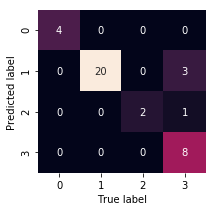

In [18]:
def plot_conf_mat(cm):
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(cm, annot=True,cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
plot_conf_mat(cm)

In [19]:
from sklearn.model_selection import cross_val_score

cross_val = cross_val_score(model, X, y, cv=10)
cross_val

C:\Users\Nayeem\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


array([0.68181818, 0.81818182, 0.5       , 0.95      , 0.78947368,
       0.82352941, 1.        , 0.82352941, 0.94117647, 0.70588235])

In [20]:
# Comparing single score and cross_val_score
score1 = model.score(X_test, y_test)

score2 = np.mean(cross_val_score(model, X, y, cv=10))

score1, score2

C:\Users\Nayeem\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


(0.8947368421052632, 0.802450042217844)

# Tuning hyperparameters using RandomizedSearchCV

In [21]:
# Create a hyperparameter grid for random forest classifier

model_grid = {"n_estimators": np.arange(10, 1000, 50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}

In [22]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_model = RandomizedSearchCV(RandomForestClassifier(), param_distributions=model_grid, cv=10, n_iter=20, verbose=True)

# Fit random hyperparameter search model
rs_model.fit(X_train, y_train);

Fitting 10 folds for each of 20 candidates, totalling 200 fits


C:\Users\Nayeem\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  1.5min finished
C:\Users\Nayeem\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [23]:
rs_model.best_params_

{'n_estimators': 710,
 'min_samples_split': 16,
 'min_samples_leaf': 3,
 'max_depth': 10}

In [24]:
rs_model.score(X_test, y_test)

0.8157894736842105

# Getting accuracy, precision, recall and f1-score with our best model

In [25]:
rf_model_accuracy = accuracy_score(y_test, y_pred)
rf_model_accuracy

0.8947368421052632

In [26]:
rf_model_precision = precision_score(y_test, y_pred, average='weighted')
rf_model_precision

0.9298245614035089

In [27]:
rf_model_recall = recall_score(y_test, y_pred, average='weighted')
rf_model_recall

0.8947368421052632

In [28]:
rf_model_f1 = f1_score(y_test, y_pred, average='weighted')
rf_model_f1

0.8998776009791921

### Visualizing

Accuracy of the model is: 89.47%
Precision of the model is: 0.93
Recall of the model is: 0.89
F1-score of the model is: 0.90


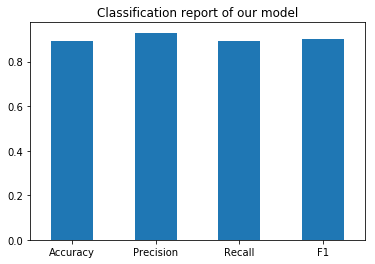

In [29]:
# Visualize our cross validated metrics
cv_metrics = pd.DataFrame({"Accuracy": rf_model_accuracy,
                          "Precision": rf_model_precision,
                          "Recall": rf_model_recall,
                          "F1": rf_model_f1}, index=[0])
cv_metrics.T.plot.bar(title="Classification report of our model",legend=False)
plt.xticks(rotation=0);
print(f"Accuracy of the model is: {rf_model_accuracy *100:.2f}%")
print(f"Precision of the model is: {rf_model_precision:.2f}")
print(f"Recall of the model is: {rf_model_recall:.2f}")
print(f"F1-score of the model is: {rf_model_f1:.2f}")

In [38]:
table = pd.DataFrame({"Ground_truth": y_test, "Predicted_value": y_pred})

In [39]:
table

,Ground_truth,Predicted_value
144,Stand,Stand
6,Stand,Stand
22,Stand,Walk
18,Stand,Stand
23,Stand,Walk
50,Walk,Walk
10,Stand,Stand
5,Stand,Stand
1,Stand,Stand
103,Walk,Walk
